In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = './data/riasec/cleaned_data.csv'
df = pd.read_csv(file_path)
df = df.loc[:, 'R1':'C8']

df.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8
0,3,4,3,1,1,4,1,3,5,5,...,1,3,1,3,1,1,1,3,1,1
1,1,1,2,4,1,2,2,1,5,5,...,1,3,1,1,2,1,1,2,1,1
2,2,1,1,1,1,1,1,1,4,1,...,4,3,1,3,2,2,1,2,4,1
3,3,1,1,2,2,2,2,2,4,1,...,2,3,3,2,3,3,2,2,2,2
4,4,1,1,2,1,1,1,2,5,5,...,2,2,4,2,2,4,5,5,2,2


C:\Users\user\AppData\Local\Temp\ipykernel_17904\1818797011.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = clusters


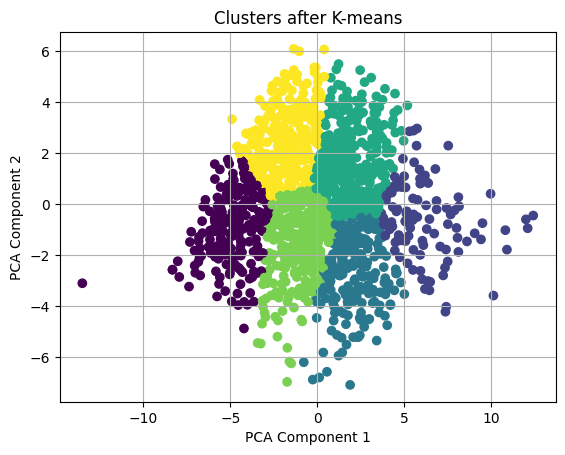

   Cluster
0        3
1        5
2        4
3        4
4        3


In [7]:
data_subset = df.head(1500)

# Misalnya data subset hanya terdiri dari kolom fitur numerik yang relevan
# Jika perlu, pastikan hanya memilih kolom-kolom yang relevan
riasec_data = data_subset.select_dtypes(include=[np.number])

# Normalisasi data dengan StandardScaler
scaler = StandardScaler()
riasec_scaled = scaler.fit_transform(riasec_data)

# Terapkan PCA untuk mengurangi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
riasec_pca = pca.fit_transform(riasec_scaled)

# Tentukan jumlah cluster yang optimal dengan K-means
kmeans_optimal = KMeans(n_clusters=6, random_state=42)
clusters = kmeans_optimal.fit_predict(riasec_pca)

# Tambahkan label cluster ke dataset yang sesuai
data_subset['Cluster'] = clusters

# Visualisasi hasil clustering menggunakan PCA
plt.scatter(riasec_pca[:, 0], riasec_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters after K-means')
plt.grid(True)
plt.show()

# Jika kamu ingin melihat hasil clustering pada data
print(data_subset[['Cluster']].head())

In [8]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(riasec_pca, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.34


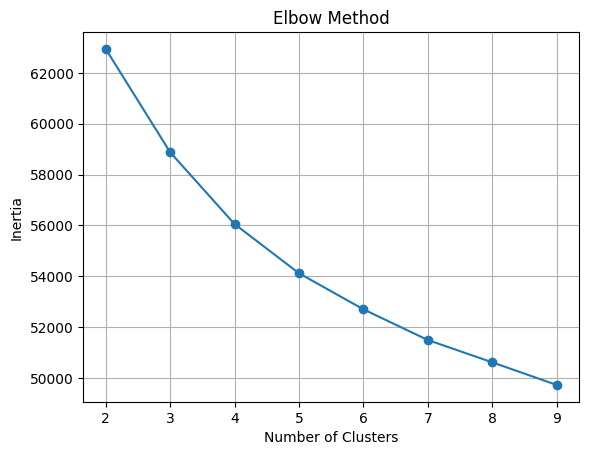

In [11]:
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(riasec_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


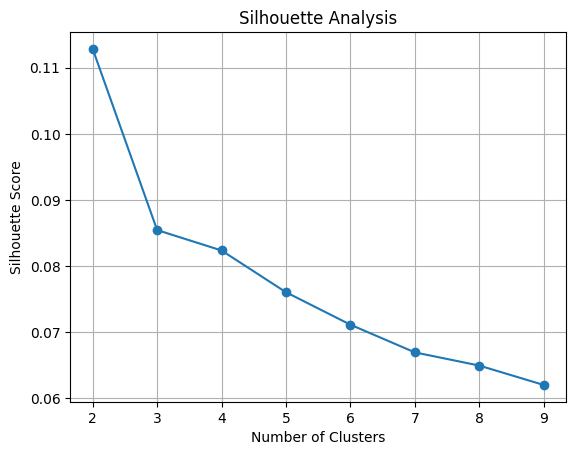

In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(riasec_scaled)
    silhouette_scores.append(silhouette_score(riasec_scaled, clusters))

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17904\339498595.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = clusters


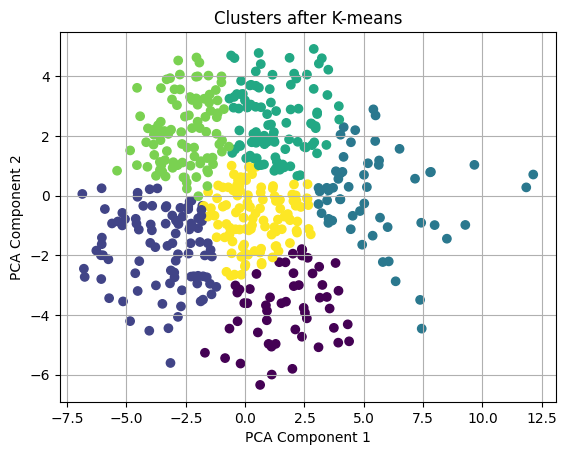

   Cluster
0        3
1        4
2        1
3        5
4        3


In [17]:
data_subset = df.head(500)

# Misalnya data subset hanya terdiri dari kolom fitur numerik yang relevan
# Jika perlu, pastikan hanya memilih kolom-kolom yang relevan
riasec_data = data_subset.select_dtypes(include=[np.number])

# Normalisasi data dengan StandardScaler
scaler = StandardScaler()
riasec_scaled = scaler.fit_transform(riasec_data)

# Terapkan PCA untuk mengurangi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
riasec_pca = pca.fit_transform(riasec_scaled)

# Tentukan jumlah cluster yang optimal dengan K-means
kmeans_optimal = KMeans(n_clusters=6, random_state=42)
clusters = kmeans_optimal.fit_predict(riasec_pca)

# Tambahkan label cluster ke dataset yang sesuai
data_subset['Cluster'] = clusters

# Visualisasi hasil clustering menggunakan PCA
plt.scatter(riasec_pca[:, 0], riasec_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters after K-means')
plt.grid(True)
plt.show()

# Jika kamu ingin melihat hasil clustering pada data
print(data_subset[['Cluster']].head())

In [18]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(riasec_pca, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.35
